C:\Users\bashc\AppData\Local\Temp\ipykernel_44544\2046405810.py:70: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,100])


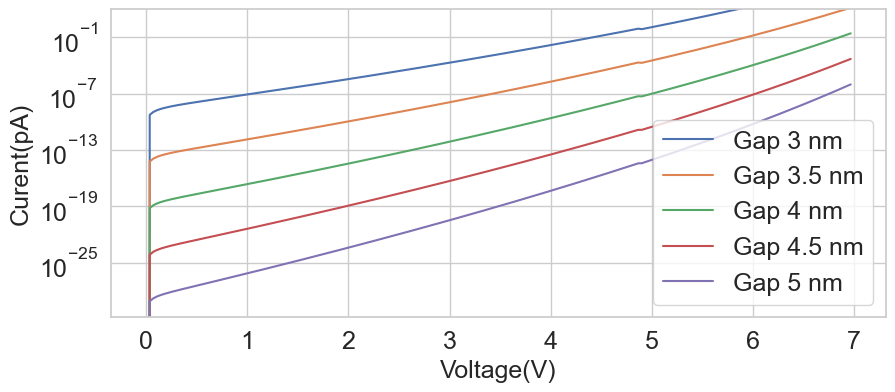

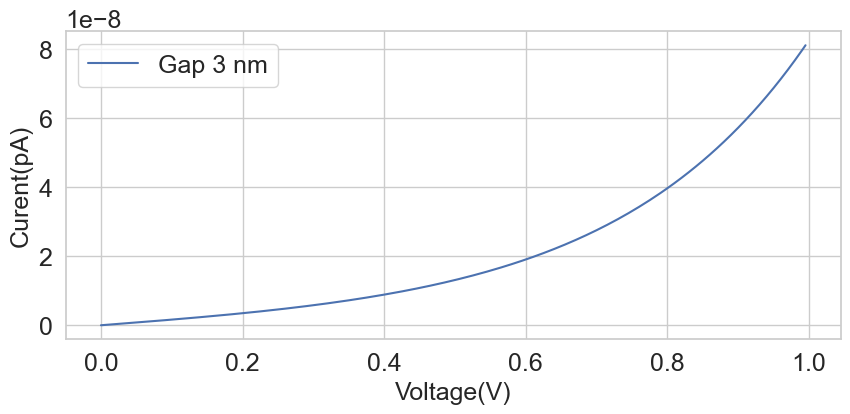

In [2]:
from collections import Counter
import os
import json
import re
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# first part with least squares
from scipy.optimize import curve_fit

# second part about ODR
from scipy.odr import ODR, Model, Data, RealData

import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")





def c_s2(v,S,phi0,K):
    return np.where(v<phi0, S*(1-46/(3*phi0*K*S+20-2*v*K*S))+6/K/phi0,S-6/K/phi0 )
    #if (v<phi0):
    #    return S*(1-46/(3*phi0*K*S+20-2*v*K*S))+6/K/phi0
    #else:
    #    return S-6/K/phi0
def c_s1(v,S,phi0,K):
    return 6/K/phi0

def c_phiL(v,S,phi0,K):
    s1=c_s1(v,S,phi0,K)
    s2=c_s2(v,S,phi0,K)
    ds=s2-s1
    return ds,phi0-(v/2/S)*(s1+s2)-(5.75/K/ds)*np.log(s2/s1*(S-s1)/(S-s2))
    
def I(v,S,phi0,K,R,I0):
    ds,phiL=c_phiL(v,S,phi0,K)
    return I0+R*v+ 1e6/4e-12*(6.2e10/ds/ds)*(phiL*np.exp(-1.025*ds*phiL**.5)-(phiL+v)*np.exp(-1.025*ds*(phiL+v)**.5) )

S0 =3.9
phi00= 4.9
K0=9
R0=0
I0=0


v2 =np.arange(0,7,7/200)


plt.rc('font', size=18) #controls default text size
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=18) #fontsize of the x tick labels
plt.rc('ytick', labelsize=18) #fontsize of the y tick labels
plt.rc('legend', fontsize=18) #fontsize of the legend

plt.figure(figsize=(10,4))

plt.semilogy(v2, I(v2, 30 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 3 nm")
plt.semilogy(v2, I(v2, 35 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 3.5 nm")
plt.plot(v2, I(v2, 40 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 4 nm")
plt.plot(v2, I(v2, 45 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 4.5 nm")
plt.plot(v2, I(v2, 50 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 5 nm")
#plt.plot(v2, I(v2, 60 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 6 nm")
plt.xlabel("Voltage(V)")
plt.ylabel("Curent(pA)")
plt.ylim([0,100])
plt.legend()
plt.show()


plt.figure(figsize=(10,4))
v2 =np.arange(0,1,1/200)
plt.plot(v2, I(v2, 30 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 3 nm")
 
plt.xlabel("Voltage(V)")
plt.ylabel("Curent(pA)")
 
plt.legend()
plt.show()

C:\Users\bashc\AppData\Local\Temp\ipykernel_44544\2046405810.py:41: RuntimeWarning: invalid value encountered in sqrt
  return I0+R*v+ 1e6/4e-12*(6.2e10/ds/ds)*(phiL*np.exp(-1.025*ds*phiL**.5)-(phiL+v)*np.exp(-1.025*ds*(phiL+v)**.5) )


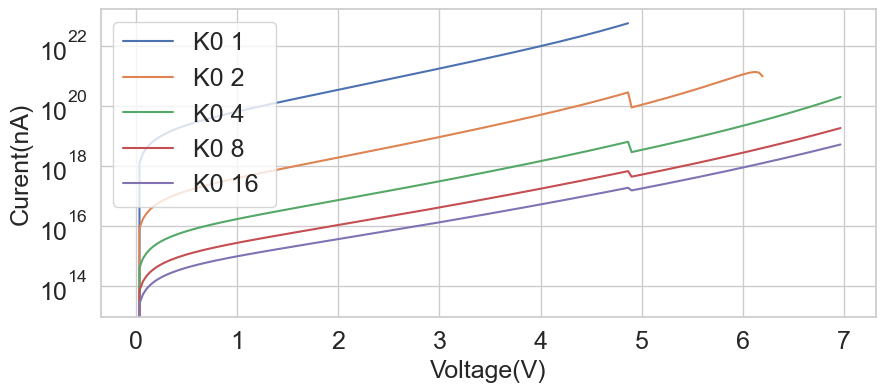

In [11]:

S0 =3.9
phi00= 4.9
K0=9
R0=0
I0=0


v2 =np.arange(0,7,7/200)


plt.rc('font', size=18) #controls default text size
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=18) #fontsize of the x tick labels
plt.rc('ytick', labelsize=18) #fontsize of the y tick labels
plt.rc('legend', fontsize=18) #fontsize of the legend

plt.figure(figsize=(10,4))

plt.semilogy(v2, I(v2, 10 ,phi00 ,1,R0,I0 )*1e-3, label="K0 1 ")
plt.semilogy(v2, I(v2, 10 ,phi00 ,2,R0,I0 )*1e-3, label="K0 2 ")
plt.semilogy(v2, I(v2, 10 ,phi00 ,4,R0,I0 )*1e-3, label="K0 4 ")
plt.semilogy(v2, I(v2, 10 ,phi00 ,8,R0,I0 )*1e-3, label="K0 8 ")
plt.semilogy(v2, I(v2, 10 ,phi00 ,16,R0,I0 )*1e-3, label="K0 16 ")
#plt.plot(v2, I(v2, 60 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 6 nm")
plt.xlabel("Voltage(V)")
plt.ylabel("Curent(nA)")
 
plt.legend()
plt.show()
 


In [ ]:



def c_s2(v,S,phi0,K):
    return np.where(v<phi0, S*(1-46/(3*phi0*K*S+20-2*v*K*S))+6/K/phi0,S-6/K/phi0 )
    #if (v<phi0):
    #    return S*(1-46/(3*phi0*K*S+20-2*v*K*S))+6/K/phi0
    #else:
    #    return S-6/K/phi0
def c_s1(v,S,phi0,K):
    return 6/K/phi0

def c_phiL(v,S,phi0,K):
    s1=c_s1(v,S,phi0,K)
    s2=c_s2(v,S,phi0,K)
    ds=s2-s1
    return ds,phi0-(v/2/S)*(s1+s2)-(5.75/K/ds)*np.log(s2/s1*(S-s1)/(S-s2))
    
def I(v,S,phi0,K,R,I0):
    ds,phiL=c_phiL(v,S,phi0,K)
    return I0+R*v+ 1e6/4e-12*(6.2e10/ds/ds)*(phiL*np.exp(-1.025*ds*phiL**.5)-(phiL+v)*np.exp(-1.025*ds*(phiL+v)**.5) )




S0 =3.9
phi00= 4.9
K0=11
R0=0
I0=0


df["v2"] =np.arange(0,7,7/200)
df["model"] = I(df["v2"], S0 ,phi00 ,K0,R0,I0 )


plt.rc('font', size=18) #controls default text size
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=18) #fontsize of the x tick labels
plt.rc('ytick', labelsize=18) #fontsize of the y tick labels
plt.rc('legend', fontsize=18) #fontsize of the legend

plt.figure(figsize=(10,4))

plt.semilogy(df["v2"], I(df["v2"], 30 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 3 nm")
plt.plot(df["v2"], I(df["v2"], 40 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 4 nm")
plt.plot(df["v2"], I(df["v2"], 50 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 5 nm")
plt.plot(df["v2"], I(df["v2"], 60 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 6 nm")
plt.xlabel("Voltage(V)")
plt.ylabel("Curent(pA)")
plt.ylim([0,100])
plt.legend()
plt.show()


In [ ]:
plt.rc('font', size=18) #controls default text size
plt.rc('axes', titlesize=18) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=18) #fontsize of the x tick labels
plt.rc('ytick', labelsize=18) #fontsize of the y tick labels
plt.rc('legend', fontsize=18) #fontsize of the legend

plt.figure(figsize=(10,4))

plt.semilogy(df["v2"], I(df["v2"], 30 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 3 nm")
plt.plot(df["v2"], I(df["v2"], 40 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 4 nm")
plt.plot(df["v2"], I(df["v2"], 50 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 5 nm")
plt.plot(df["v2"], I(df["v2"], 60 ,phi00 ,K0,R0,I0 )*1e-6, label="Gap 6 nm")
plt.xlabel("Voltage(V)")
plt.ylabel("Curent(pA)")
plt.ylim([0,100])
plt.legend()
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
print(df.loc[:,["v2","model"]])

In [ ]:
popt, pcov = curve_fit(
    f=I,       # model function
    xdata=np.array(x),   # x data
    ydata=np.array(y),   # y data
    p0=(S0 ,phi00 ,K0,R0,I0)      # initial value of the parameters
)
ax = df.plot(
    x="Voltage", y="Current",
    kind="line", title="IV", marker=".")

df["model"] = I(np.array(x),popt[0] ,popt[1] ,popt[2],popt[3],popt[4] )
ax = df.plot(
    x="Voltage", y="model",
    kind="line", ax=ax, linewidth=1
)
print(popt )